# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [2]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [3]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', delimiter= ';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', delimiter= ';')

In [4]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

In [5]:
azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [6]:
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [7]:
feat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
attribute             85 non-null object
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
dtypes: object(4)
memory usage: 2.7+ KB


In [7]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [8]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

print(azdias.shape)
print('_______________________')
print(feat_info.shape)

(891221, 85)
_______________________
(85, 4)


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

#### Below cell shows the naturally missing data in azdias data frame

In [9]:
# Naturally missing data
missing_data = azdias.isnull().sum().sum()
display(missing_data)

4896838

#### I have created a function that contain an empty list to store a values from a column such as missing_or_unknown column from feat_info after split the values by a comma ','

In [11]:
# Identify missing or unknown data values and convert them to NaNs.
# Creating a function to store the seprated values by ',' in a list

def strip_list(missing_unknown):
    temp_list = []
    
    for item in missing_unknown:
        temp_list.append(item[1:-1].split(','))
    return temp_list

feat_info_missing = strip_list(feat_info['missing_or_unknown'])


In [12]:
feat_info.columns

Index(['attribute', 'information_level', 'type', 'missing_or_unknown'], dtype='object')

#### The strip_list function has seprated the missing_or_unknown after passing the column. It is time to covert them all to (int) then map it to azdias and mark the empty with nan through the below for loop.

In [13]:
for attribute,temp_list_2 in zip(feat_info["attribute"],feat_info_missing):
    if temp_list_2[0] != "":  
        for temp_list in temp_list_2:
            if temp_list.isnumeric() or temp_list.lstrip('-').isnumeric():
                temp_list = int(temp_list)
            
            azdias.loc[azdias[attribute] == temp_list, attribute] = np.nan

#### In below cell I have checked again the null values. The null values has been increased, this ok since the we convert the missing or unknown values to null.

In [14]:
missing_data = azdias.isnull().sum().sum()
display(missing_data)

8373929

In [114]:
azdias.head(10)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2.0,1.0,2.0,3.0,4.0,3.0,5.0,5.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2.0,5.0,1.0,5.0,2.0,5.0,4.0,5.0,1.0,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,6.0,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1.0,5.0,4.0,3.0,4.0,1.0,3.0,2.0,5.0,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,1.0,2.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,2.0,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,2.0,2.0,5.0,1.0,5.0,1.0,5.0,4.0,3.0,4.0,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,1.0,1.0,3.0,3.0,3.0,4.0,1.0,3.0,2.0,5.0,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,3.0,1.0,3.0,4.0,4.0,2.0,4.0,2.0,2.0,6.0,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,3.0,2.0,4.0,2.0,4.0,2.0,3.0,5.0,4.0,1.0,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


In [16]:
azdias.columns

Index(['AGER_TYP', 'ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'CJT_GESAMTTYP',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP', 'GEBURTSJAHR', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE',
       'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
       'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN',
       'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE',
       'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT',
       'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT',
       'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SHOPPER_TYP', 'SOHO_KZ', 'TITEL_KZ', 'VERS_TYP', 'ZABEOTYP',
       'ALTER_HH', 'ANZ_PERSONEN', 'ANZ_TITEL', 'HH_EINKOMMEN_SCORE',
       'KK_KUNDENTYP', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'GEBAEUDETYP', 'KONSUMNAEHE',
       'MIN_

In [17]:
missing_data = azdias.isnull().sum()

In [18]:
missing_data.sort_values(ascending= True, inplace= True)

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

#### To better visualize this data, we will use the proportion of missing data for each columns.

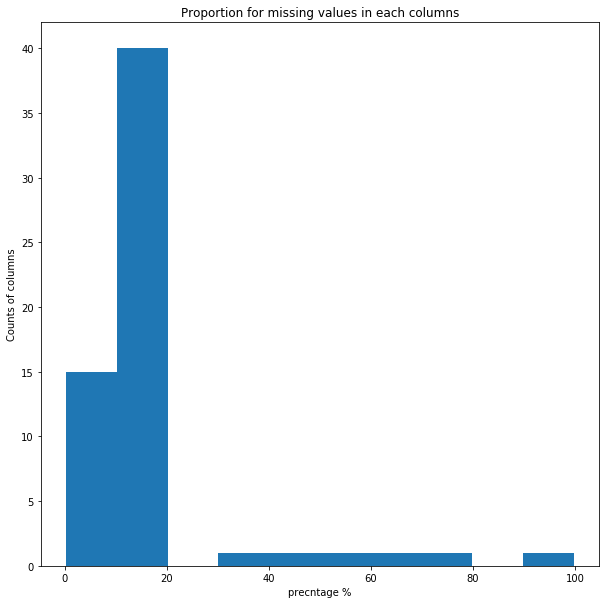

In [19]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

prop_missing_data = missing_data[missing_data>0] / (azdias.shape[0])*100

plt.figure(figsize=(10,10))
plt.hist(prop_missing_data)
plt.title('Proportion for missing values in each columns')
plt.xlabel('precntage %')
plt.ylabel('Counts of columns')
plt.show()

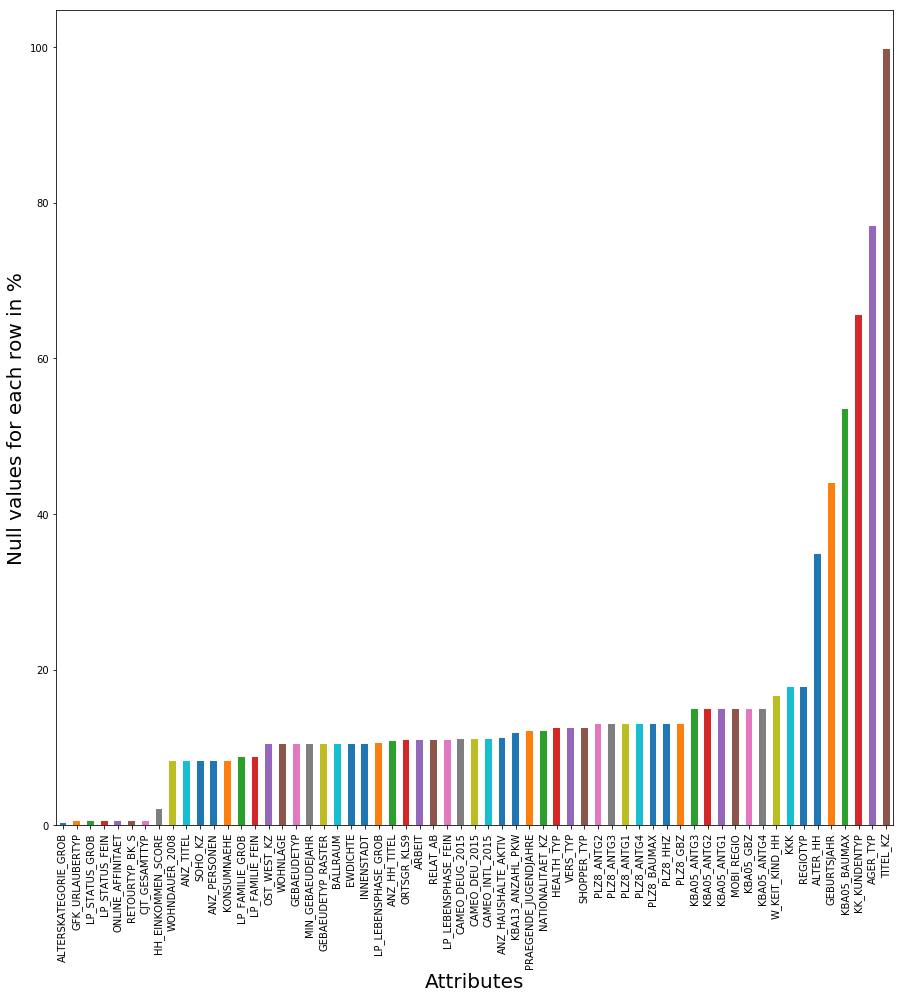

In [20]:
# Investigate patterns in the amount of missing data in each column.
plt.figure(figsize=(15,15))
prop_missing_data.plot.bar()
plt.xlabel('Attributes', fontsize = 20)
plt.ylabel('Null values for each row in %', fontsize = 20)
plt.show()

#### I will consider the below columns to be outliers

In [21]:
# Identigying the outliers columns 
outliers = prop_missing_data[prop_missing_data > 18].index
outliers

Index(['ALTER_HH', 'GEBURTSJAHR', 'KBA05_BAUMAX', 'KK_KUNDENTYP', 'AGER_TYP',
       'TITEL_KZ'],
      dtype='object')

#### These are the outliers that will be removed 

In [22]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
azdias.drop(columns= outliers, axis="outliers", inplace= True)

#### Below is the shape after dropping the outliers

In [23]:
azdias.shape

(891221, 79)

#### Discussion 1.1.2: Assess Missing Data in Each Column

we can see from the plot that most of the attributes are within the range between 0 - 18, I will consider the attributes above 18% an outliers.

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [24]:
# How much data is missing in each row of the dataset?
missing_data_row = azdias.isnull().sum(axis=1)
missing_data_row.describe()

count    891221.000000
mean          5.649894
std          13.234687
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          49.000000
dtype: float64

#### The total number of missing values for all the rows is 891221 and the maximum missing values for one row is 49.

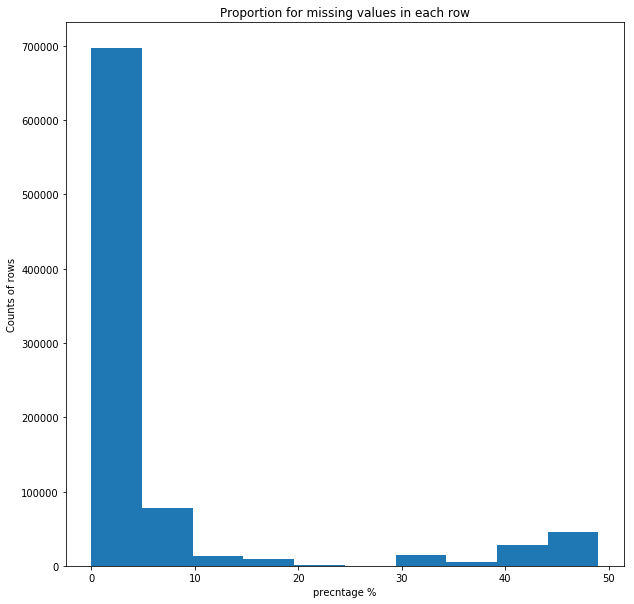

In [25]:
# Now to seprate the data into 2 subset 
#we will plot it using hist() to see the distrubution of the data
plt.figure(figsize=(10,10))
plt.hist(missing_data_row)
plt.title('Proportion for missing values in each row')
plt.xlabel('precntage %')
plt.ylabel('Counts of rows')
plt.show()

#### from the hist(), we can see that we can divide our data into 2 subset. The first data will be from 0-30 and the second data will be from 30-49.

In [26]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
missing_data_below_30 = azdias[missing_data_row < 30]
missing_data_above_30 = azdias[missing_data_row > 30]

In [27]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
most_few_missing_colm = prop_missing_data[prop_missing_data < 18].index

In [28]:
most_few_missing_colm = most_few_missing_colm[:8]

In [29]:
most_few_missing_colm

Index(['ALTERSKATEGORIE_GROB', 'GFK_URLAUBERTYP', 'LP_STATUS_GROB',
       'LP_STATUS_FEIN', 'ONLINE_AFFINITAET', 'RETOURTYP_BK_S',
       'CJT_GESAMTTYP', 'HH_EINKOMMEN_SCORE'],
      dtype='object')

In [30]:
def comparison(column):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    ax1.set_title('Missing data from 0 to 30')
    sns.countplot(azdias.loc[missing_data_below_30.index,column], ax =ax1, color='green')
    ax2.set_title('Missing data from 30 to 49')
    sns.countplot(azdias.loc[missing_data_above_30.index, column], ax = ax2, color='orange')
    
    plt.tight_layout()
    plt.show()

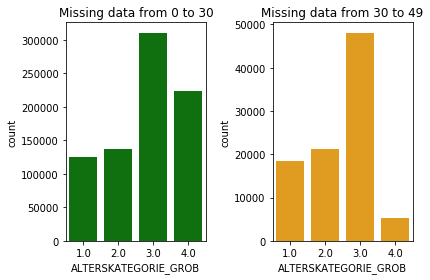

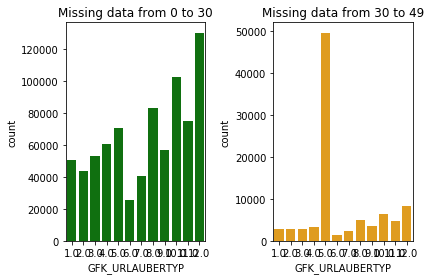

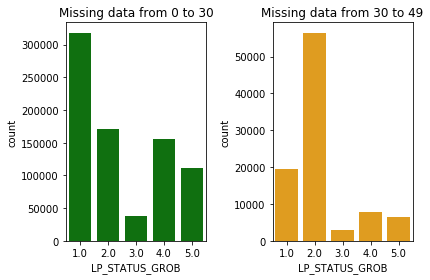

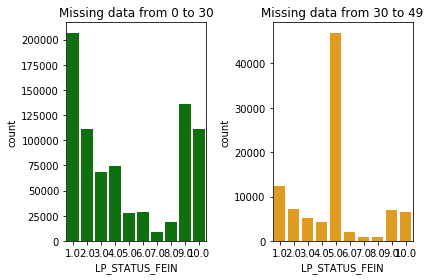

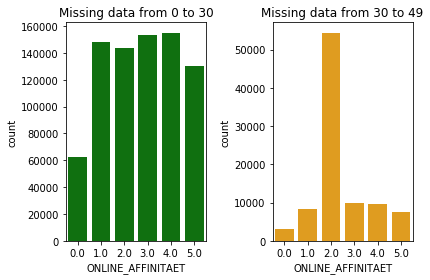

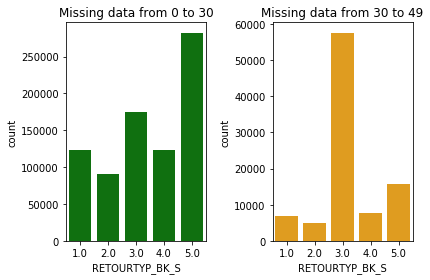

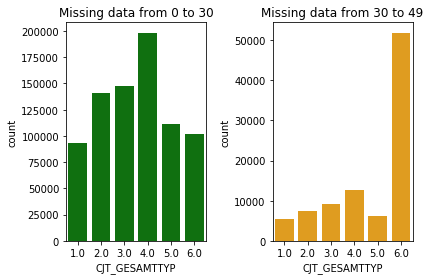

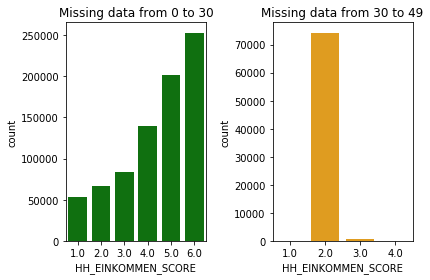

In [31]:
for i in range(most_few_missing_colm.size):
    comparison(most_few_missing_colm[i])

In [ ]:
# Adding mode to the missing values.

#### As the subset of few or no missing values has some missing values, we need to handle them. One way to handle the missing values is to fill them by most frequent values such mode.

In [32]:
missing_data_below_30 = missing_data_below_30.fillna(missing_data_below_30.mode().iloc[0])

#### Discussion 1.1.3: Assess Missing Data in Each Row

From the above plots, we can see that the data with lots of missing values are different from the data with few or no missing values.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [33]:
# How many features are there of each data type?
feat_info = feat_info[feat_info.attribute.isin(missing_data_below_30.columns)]

In [34]:
feat_info.type.value_counts(sort= True)

ordinal        49
categorical    18
numeric         6
mixed           6
Name: type, dtype: int64

In [35]:
feat_info.count()

attribute             79
information_level     79
type                  79
missing_or_unknown    79
dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [36]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
feat_info_cate_name = feat_info[feat_info['type'] == 'categorical']['attribute'].values
feat_info_cate = feat_info[feat_info.type == 'categorical']

In [37]:
binary_cate = []
multi_cate = []

for i in feat_info_cate.attribute:
    if missing_data_below_30[i].nunique()==2:
        binary_cate.append(i)
    else:
        multi_cate.append(i)

#### Below are the binary categories

In [38]:
for i in binary_cate:
    print(missing_data_below_30[i].value_counts())

2.0    416177
1.0    381884
Name: ANREDE_KZ, dtype: int64
0    622836
1    175225
Name: GREEN_AVANTGARDE, dtype: int64
0.0    791344
1.0      6717
Name: SOHO_KZ, dtype: int64
2.0    430959
1.0    367102
Name: VERS_TYP, dtype: int64
W    629520
O    168541
Name: OST_WEST_KZ, dtype: int64


#### Below are the multi-level categories

In [39]:
for i in multi_cate:
    print(missing_data_below_30[i].value_counts())

4.0    203040
3.0    147220
2.0    141269
5.0    111114
6.0    102107
1.0     93311
Name: CJT_GESAMTTYP, dtype: int64
6.0    289061
1.0    197171
5.0    106332
2.0    104773
4.0     55922
3.0     44802
Name: FINANZTYP, dtype: int64
12.0    135006
10.0    102831
8.0      83030
11.0     75103
5.0      70501
4.0      60422
9.0      57131
3.0      53101
1.0      50659
2.0      43857
7.0      40681
6.0      25739
Name: GFK_URLAUBERTYP, dtype: int64
1.0     434024
10.0    128974
2.0      98555
11.0     48746
8.0      21780
7.0      19575
4.0      11574
5.0      11167
9.0      10452
6.0       8526
3.0       4688
Name: LP_FAMILIE_FEIN, dtype: int64
1.0    434024
5.0    188172
2.0     98555
4.0     49881
3.0     27429
Name: LP_FAMILIE_GROB, dtype: int64
1.0     211598
9.0     136353
10.0    111574
2.0     111118
4.0      73973
3.0      68918
6.0      28896
5.0      27592
8.0      18835
7.0       9204
Name: LP_STATUS_FEIN, dtype: int64
1.0    322716
2.0    170483
4.0    155188
5.0    111574
3.0 

#### Now I will re-encode the binary values to be 0 and 1 using dictionaries. Since the 'GREEN_AVANTGARDE' is already encoded 1 and 0, I will not include it

In [40]:
# Re-encode categorical variable(s) to be kept in the analysis.
#below re-encode the binary categorical variables
missing_data_below_30['ANREDE_KZ'].replace({2.0:0, 1.1:1}, inplace= True)
missing_data_below_30['VERS_TYP'].replace({2.0:0, 1.1:1}, inplace= True)
missing_data_below_30['OST_WEST_KZ'].replace({'W':0, 'O':1}, inplace= True)

#### Below are binary categories after re-encod.

In [41]:
for i in binary_cate:
    print(missing_data_below_30[i].value_counts())

0.0    416177
1.0    381884
Name: ANREDE_KZ, dtype: int64
0    622836
1    175225
Name: GREEN_AVANTGARDE, dtype: int64
0.0    791344
1.0      6717
Name: SOHO_KZ, dtype: int64
0.0    430959
1.0    367102
Name: VERS_TYP, dtype: int64
0    629520
1    168541
Name: OST_WEST_KZ, dtype: int64


#### For multi-level categories, I choosed to use dummy variables

In [42]:
# below re-encode multi_categorical variables
missing_data_below_30 = pd.get_dummies(data=missing_data_below_30,columns=multi_cate)

In [43]:
missing_data_below_30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798061 entries, 1 to 891220
Columns: 194 entries, ALTERSKATEGORIE_GROB to CAMEO_DEU_2015_9E
dtypes: float64(63), int64(2), object(1), uint8(128)
memory usage: 505.4+ MB


#### Discussion 1.2.1: Re-Encode Categorical Features
For the binary categories, I have re-encoded them directly since they have two pssible values (0,1) (True,False).

For the multi-level categories, I choosed to not drop them and use the dummy variables to re-encode them

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [44]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
missing_data_below_30['PRAEGENDE_JUGENDJAHRE'].head(10)

1     14.0
2     15.0
3      8.0
4      8.0
5      3.0
6     10.0
7      8.0
8     11.0
9     15.0
10     3.0
Name: PRAEGENDE_JUGENDJAHRE, dtype: float64

In [45]:
missing_data_below_30.isnull().sum()

ALTERSKATEGORIE_GROB     0
ANREDE_KZ                0
FINANZ_MINIMALIST        0
FINANZ_SPARER            0
FINANZ_VORSORGER         0
FINANZ_ANLEGER           0
FINANZ_UNAUFFAELLIGER    0
FINANZ_HAUSBAUER         0
GREEN_AVANTGARDE         0
HEALTH_TYP               0
LP_LEBENSPHASE_FEIN      0
LP_LEBENSPHASE_GROB      0
PRAEGENDE_JUGENDJAHRE    0
RETOURTYP_BK_S           0
SEMIO_SOZ                0
SEMIO_FAM                0
SEMIO_REL                0
SEMIO_MAT                0
SEMIO_VERT               0
SEMIO_LUST               0
SEMIO_ERL                0
SEMIO_KULT               0
SEMIO_RAT                0
SEMIO_KRIT               0
SEMIO_DOM                0
SEMIO_KAEM               0
SEMIO_PFLICHT            0
SEMIO_TRADV              0
SOHO_KZ                  0
VERS_TYP                 0
                        ..
CAMEO_DEU_2015_4B        0
CAMEO_DEU_2015_4C        0
CAMEO_DEU_2015_4D        0
CAMEO_DEU_2015_4E        0
CAMEO_DEU_2015_5A        0
CAMEO_DEU_2015_5B        0
C

In [46]:
# an interval value for the decades
decade = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4, 10:5, 11:5, 12:5, 13:5, 14:6, 15:6}
# mainstream = 0, avantgrade = 1 
movement = {1:0, 2:1, 3:0, 4:1, 5:0, 6:1, 7:1, 8:0, 9:1, 10:0, 11:1, 12:0, 13:1, 14:0, 15:1}

# Creating 2 new columns to replcae "PRAEGENDE_JUGENDJAHRE"  
missing_data_below_30['PRAEGENDE_JUGENDJAHRE_Decade'] = missing_data_below_30.PRAEGENDE_JUGENDJAHRE
missing_data_below_30['PRAEGENDE_JUGENDJAHRE_Movement'] = missing_data_below_30.PRAEGENDE_JUGENDJAHRE

In [47]:
# mapping the dict to the new columns 
missing_data_below_30['PRAEGENDE_JUGENDJAHRE_Decade'].replace(decade, inplace =True)
missing_data_below_30['PRAEGENDE_JUGENDJAHRE_Movement'].replace(movement, inplace =True)

In [48]:
#Now since we added the new colmuns and mapped with it is values,
# we will drop the "PRAEGENDE_JUGENDJAHRE" colmuns
missing_data_below_30.drop('PRAEGENDE_JUGENDJAHRE', axis= 1, inplace=True)

In [49]:
missing_data_below_30.head(35)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_8B,CAMEO_DEU_2015_8C,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,PRAEGENDE_JUGENDJAHRE_Decade,PRAEGENDE_JUGENDJAHRE_Movement
1,1.0,0.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,0,0,0,0,0,0,0,0,6.0,0.0
2,3.0,0.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,0,0,0,0,0,0,0,0,6.0,1.0
3,4.0,0.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,0,0,0,0,0,0,0,0,4.0,0.0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,0,0,0,0,0,0,0,0,4.0,0.0
5,1.0,0.0,3.0,1.0,5.0,2.0,2.0,5.0,0,3.0,...,0,1,0,0,0,0,0,0,2.0,0.0
6,2.0,0.0,1.0,5.0,1.0,5.0,4.0,3.0,0,2.0,...,0,0,0,0,0,0,0,0,5.0,0.0
7,1.0,1.0,3.0,3.0,4.0,1.0,3.0,2.0,0,1.0,...,0,0,0,0,0,0,0,0,4.0,0.0
8,3.0,1.0,4.0,4.0,2.0,4.0,2.0,2.0,1,3.0,...,0,0,0,0,0,0,0,0,5.0,1.0
9,3.0,0.0,2.0,4.0,2.0,3.0,5.0,4.0,1,2.0,...,0,0,0,0,0,0,0,0,6.0,1.0
10,3.0,0.0,2.0,2.0,5.0,3.0,1.0,5.0,0,2.0,...,0,0,0,0,0,0,1,0,2.0,0.0


In [50]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
missing_data_below_30['CAMEO_INTL_2015'].value_counts()



## Wealth dictionary

wealth = {'11':1, '12':1, '13':1 ,'14':1 ,'15':1,
          '21':2, '22':2, '23':2, '24':2, '25':2,
          '31':3, '32':3, '33':3, '34':3, '35':3,
          '41':4, '42':4, '43':4, '44':4, '45':4,
          '51':5, '52':5, '53':5, '54':5, '55':5}

#Life_stage dictionary

life_stage= {'11':1, '12':2, '13':3 ,'14':4 ,'15':5,
             '21':1, '22':2, '23':3, '24':4, '25':5,
             '31':1, '32':2, '33':3, '34':4, '35':5,
             '41':1, '42':2, '43':3, '44':4, '45':5,
             '51':1, '52':2, '53':3, '54':4, '55':5}

#Creating 2 new columns to replcae "CAMEO_INTL_2015"  
missing_data_below_30['CAMEO_INTL_2015_wealth'] = missing_data_below_30.CAMEO_INTL_2015
missing_data_below_30['CAMEO_INTL_2015_life_stage'] = missing_data_below_30.CAMEO_INTL_2015

In [51]:
# mapping the dict to the new columns 
missing_data_below_30['CAMEO_INTL_2015_wealth'].replace(wealth, inplace =True)
missing_data_below_30['CAMEO_INTL_2015_life_stage'].replace(life_stage, inplace =True)

In [52]:
#Now since we added the new colmuns and mapped with it is values,
# we will drop the "CAMEO_INTL_2015" colmuns
missing_data_below_30.drop('CAMEO_INTL_2015', axis= 1, inplace=True)

#### Discussion 1.2.2: Engineer Mixed-Type Features

Accordin to the "PRAEGENDE_JUGENDJAHRE" from Data_Dictionar, I have created 2 dict one to hold the decade and one to hold the movement based on the similrities.

Also I did the same with CAMEO_INTL_2015, I have created 2 dictionaries, one to hold the wealth and the other the life stage 


#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [ ]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)



In [53]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.
feat_info[feat_info.type == 'mixed']

,attribute,information_level,type,missing_or_unknown
15,LP_LEBENSPHASE_FEIN,person,mixed,[0]
16,LP_LEBENSPHASE_GROB,person,mixed,[0]
22,PRAEGENDE_JUGENDJAHRE,person,mixed,"[-1,0]"
56,WOHNLAGE,building,mixed,[-1]
59,CAMEO_INTL_2015,microcell_rr4,mixed,"[-1,XX]"
79,PLZ8_BAUMAX,macrocell_plz8,mixed,"[-1,0]"


#### The above 6 attributes are mixed, I already dropped "PRAEGENDE_JUGENDJAHRE" and "CAMEO_INTL_2015" and I will drop the remianing 4 attributes.

In [54]:
missing_data_below_30.drop(['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
                           'WOHNLAGE', 'PLZ8_BAUMAX'],axis =1, inplace =True)

In [55]:
missing_data_below_30.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'FINANZ_MINIMALIST',
       'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER',
       'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'GREEN_AVANTGARDE',
       'HEALTH_TYP',
       ...
       'CAMEO_DEU_2015_8D', 'CAMEO_DEU_2015_9A', 'CAMEO_DEU_2015_9B',
       'CAMEO_DEU_2015_9C', 'CAMEO_DEU_2015_9D', 'CAMEO_DEU_2015_9E',
       'PRAEGENDE_JUGENDJAHRE_Decade', 'PRAEGENDE_JUGENDJAHRE_Movement',
       'CAMEO_INTL_2015_wealth', 'CAMEO_INTL_2015_life_stage'],
      dtype='object', length=192)

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [56]:
def clean_data(df, feat_info):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    

    temp_list = strip_list(feat_info['missing_or_unknown'])
    
    for attribute,temp_list_2 in zip(feat_info["attribute"],temp_list):
        if temp_list_2[0] != "":  
            for temp_list in temp_list_2:
                if temp_list.isnumeric() or temp_list.lstrip('-').isnumeric():
                    temp_list = int(temp_list)
            
            df.loc[df[attribute] == temp_list, attribute] = np.nan
    
    # remove selected columns and rows, ...
    # I will hard code the columns that are condired outliers
    columns=['ALTER_HH', 'GEBURTSJAHR', 'KBA05_BAUMAX', 'KK_KUNDENTYP', 'AGER_TYP',
       'TITEL_KZ']
    df.drop(columns =columns, axis = 'columns', inplace =True)
    
    # For removing rows
    missing_data_row = df.isnull().sum(axis=1)
    missing_data_below_30 = df[missing_data_row < 30]
    missing_data_above_30 = df[missing_data_row > 30]
    missing_data_below_30 = missing_data_below_30.fillna(missing_data_below_30.mode().iloc[0])    
    
    
    # select, re-encode, and engineer column values.
    feat_info = feat_info[feat_info.attribute.isin(missing_data_below_30.columns)]
    feat_info_cate_name = feat_info[feat_info['type'] == 'categorical']['attribute'].values
    feat_info_cate = feat_info[feat_info.type == 'categorical']
    
    binary_cate = []
    multi_cate = []

    for i in feat_info_cate.attribute:
        if missing_data_below_30[i].nunique()==2:
            binary_cate.append(i)
        else:
            multi_cate.append(i)
            
    #re-encoding binary values    
    missing_data_below_30['ANREDE_KZ'].replace({2.0:0, 1.1:1}, inplace= True)
    missing_data_below_30['VERS_TYP'].replace({2.0:0, 1.1:1}, inplace= True)
    missing_data_below_30['OST_WEST_KZ'].replace({'W':0, 'O':1}, inplace= True)
    #re-encoding multi values
    missing_data_below_30 = pd.get_dummies(data=missing_data_below_30,columns=multi_cate)
    # an interval value for the decades
    decade = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4, 10:5, 11:5, 12:5, 13:5, 14:6, 15:6}
    # mainstream = 0, avantgrade = 1 
    movement = {1:0, 2:1, 3:0, 4:1, 5:0, 6:1, 7:1, 8:0, 9:1, 10:0, 11:1, 12:0, 13:1, 14:0, 15:1}

    # Creating 2 new columns to replcae "PRAEGENDE_JUGENDJAHRE"  
    missing_data_below_30['PRAEGENDE_JUGENDJAHRE_Decade'] = missing_data_below_30.PRAEGENDE_JUGENDJAHRE
    missing_data_below_30['PRAEGENDE_JUGENDJAHRE_Movement'] = missing_data_below_30.PRAEGENDE_JUGENDJAHRE
    # mapping the dict to the new columns 
    missing_data_below_30['PRAEGENDE_JUGENDJAHRE_Decade'].replace(decade, inplace =True)
    missing_data_below_30['PRAEGENDE_JUGENDJAHRE_Movement'].replace(movement, inplace =True)
    # we will drop the "PRAEGENDE_JUGENDJAHRE" colmuns
    missing_data_below_30.drop('PRAEGENDE_JUGENDJAHRE', axis= 1, inplace=True)
    
    
    wealth = {'11':1, '12':1, '13':1 ,'14':1 ,'15':1,
          '21':2, '22':2, '23':2, '24':2, '25':2,
          '31':3, '32':3, '33':3, '34':3, '35':3,
          '41':4, '42':4, '43':4, '44':4, '45':4,
          '51':5, '52':5, '53':5, '54':5, '55':5}

#Life_stage dictionary

    life_stage= {'11':1, '12':2, '13':3 ,'14':4 ,'15':5,
             '21':1, '22':2, '23':3, '24':4, '25':5,
             '31':1, '32':2, '33':3, '34':4, '35':5,
             '41':1, '42':2, '43':3, '44':4, '45':5,
             '51':1, '52':2, '53':3, '54':4, '55':5}

    #Creating 2 new columns to replcae "CAMEO_INTL_2015"  
    missing_data_below_30['CAMEO_INTL_2015_wealth'] = missing_data_below_30.CAMEO_INTL_2015
    missing_data_below_30['CAMEO_INTL_2015_life_stage'] = missing_data_below_30.CAMEO_INTL_2015
    # mapping the dict to the new columns 
    missing_data_below_30['CAMEO_INTL_2015_wealth'].replace(wealth, inplace =True)
    missing_data_below_30['CAMEO_INTL_2015_life_stage'].replace(life_stage, inplace =True)
    missing_data_below_30.drop('CAMEO_INTL_2015', axis= 1, inplace=True)
    
    #Dropping mixed features
    missing_data_below_30.drop(['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
                           'WOHNLAGE', 'PLZ8_BAUMAX'],axis =1, inplace =True)
    
    # Return the cleaned dataframe.
    return missing_data_below_30

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [57]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
missing_data_below_30.isnull().sum().sum()

0

In [58]:
missing_data_below_30.describe()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,PRAEGENDE_JUGENDJAHRE_Decade,PRAEGENDE_JUGENDJAHRE_Movement,CAMEO_INTL_2015_wealth,CAMEO_INTL_2015_life_stage
count,798061.000000,798061.000000,798061.000000,798061.000000,798061.000000,798061.000000,798061.000000,798061.000000,798061.000000,798061.000000,...,798061.000000,798061.000000,798061.000000,798061.000000,798061.000000,798061.000000,798061.000000,798061.000000,798061.000000,798061.000000
mean,2.796131,0.478515,3.058917,2.716047,3.432892,2.840955,2.658348,3.114102,0.219563,2.235870,...,0.022023,0.025740,0.034679,0.031310,0.035828,0.007993,4.392105,0.219563,3.275604,2.858483
std,1.016691,0.499538,1.377577,1.485090,1.376866,1.472782,1.399530,1.408109,0.413951,0.756442,...,0.146760,0.158358,0.182966,0.174153,0.185861,0.089046,1.464292,0.413951,1.466752,1.488105
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,1.000000
50%,3.000000,0.000000,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,4.000000,3.000000
75%,4.000000,1.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,5.000000,4.000000
max,4.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,5.000000,5.000000


In [59]:
missing_data_below_30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798061 entries, 1 to 891220
Columns: 192 entries, ALTERSKATEGORIE_GROB to CAMEO_INTL_2015_life_stage
dtypes: float64(60), int64(4), uint8(128)
memory usage: 493.2 MB


In [115]:
missing_data_below_30.head(10)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,PRAEGENDE_JUGENDJAHRE_Decade,PRAEGENDE_JUGENDJAHRE_Movement,CAMEO_INTL_2015_wealth,CAMEO_INTL_2015_life_stage
1,1.0,0.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,0,0,0,0,0,0,6.0,0.0,5,1
2,3.0,0.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,0,0,0,0,0,0,6.0,1.0,2,4
3,4.0,0.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,0,0,0,0,0,0,4.0,0.0,1,2
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,0,0,0,0,0,0,4.0,0.0,4,3
5,1.0,0.0,3.0,1.0,5.0,2.0,2.0,5.0,0,3.0,...,0,0,0,0,0,0,2.0,0.0,5,4
6,2.0,0.0,1.0,5.0,1.0,5.0,4.0,3.0,0,2.0,...,0,0,0,0,0,0,5.0,0.0,2,2
7,1.0,1.0,3.0,3.0,4.0,1.0,3.0,2.0,0,1.0,...,0,0,0,0,0,0,4.0,0.0,1,4
8,3.0,1.0,4.0,4.0,2.0,4.0,2.0,2.0,1,3.0,...,0,0,0,0,0,0,5.0,1.0,1,3
9,3.0,0.0,2.0,4.0,2.0,3.0,5.0,4.0,1,2.0,...,0,0,0,0,0,0,6.0,1.0,1,5
10,3.0,0.0,2.0,2.0,5.0,3.0,1.0,5.0,0,2.0,...,0,0,0,0,1,0,2.0,0.0,5,1


In [61]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [62]:
scaled_features = scaler.fit_transform(missing_data_below_30)

In [63]:
col = missing_data_below_30.columns

In [64]:
scaled_features = pd.DataFrame(scaled_features,columns= col)

In [116]:
scaled_features.head(10)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,PRAEGENDE_JUGENDJAHRE_Decade,PRAEGENDE_JUGENDJAHRE_Movement,CAMEO_INTL_2015_wealth,CAMEO_INTL_2015_life_stage
0,-1.766646,-0.957914,-1.494594,1.537924,-1.040692,1.465965,0.958645,1.339314,-0.530409,1.010164,...,-0.150064,-0.162542,-0.189539,-0.179782,-0.192768,-0.089764,1.098070,-0.530409,1.175657,-1.248894
1,0.200522,-0.957914,-1.494594,0.864563,-1.766980,-0.570998,0.244119,1.339314,1.885336,1.010164,...,-0.150064,-0.162542,-0.189539,-0.179782,-0.192768,-0.089764,1.098070,1.885336,-0.869680,0.767095
2,1.184106,-0.957914,0.683144,-0.482158,1.138172,-0.570998,-1.184933,-0.791205,-0.530409,-0.311816,...,-0.150064,-0.162542,-0.189539,-0.179782,-0.192768,-0.089764,-0.267778,-0.530409,-1.551459,-0.576897
3,0.200522,1.043935,0.683144,0.191203,0.411884,-1.249985,0.244119,-0.791205,-0.530409,1.010164,...,-0.150064,-0.162542,-0.189539,-0.179782,-0.192768,-0.089764,-0.267778,-0.530409,0.493878,0.095099
4,-1.766646,-0.957914,-0.042768,-1.155518,1.138172,-0.570998,-0.470407,1.339314,-0.530409,1.010164,...,-0.150064,-0.162542,-0.189539,-0.179782,-0.192768,-0.089764,-1.633627,-0.530409,1.175657,0.767095
5,-0.783062,-0.957914,-1.494594,1.537924,-1.766980,1.465965,0.958645,-0.081032,-0.530409,-0.311816,...,-0.150064,-0.162542,-0.189539,-0.179782,-0.192768,-0.089764,0.415146,-0.530409,-0.869680,-0.576897
6,-1.766646,1.043935,-0.042768,0.191203,0.411884,-1.249985,0.244119,-0.791205,-0.530409,-1.633796,...,-0.150064,-0.162542,-0.189539,-0.179782,-0.192768,-0.089764,-0.267778,-0.530409,-1.551459,0.767095
7,0.200522,1.043935,0.683144,0.864563,-1.040692,0.786978,-0.470407,-0.791205,1.885336,1.010164,...,-0.150064,-0.162542,-0.189539,-0.179782,-0.192768,-0.089764,0.415146,1.885336,-1.551459,0.095099
8,0.200522,-0.957914,-0.768681,0.864563,-1.040692,0.107990,1.673172,0.629141,1.885336,-0.311816,...,-0.150064,-0.162542,-0.189539,-0.179782,-0.192768,-0.089764,1.098070,1.885336,-1.551459,1.439091
9,0.200522,-0.957914,-0.768681,-0.482158,1.138172,0.107990,-1.184933,1.339314,-0.530409,-0.311816,...,-0.150064,-0.162542,-0.189539,-0.179782,5.187587,-0.089764,-1.633627,-0.530409,1.175657,-1.248894


### Discussion 2.1: Apply Feature Scaling
I have already filled the nan values.Thus, I used StandardScaler to apply feature scaling.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [66]:
# Apply PCA to the data.
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_features)

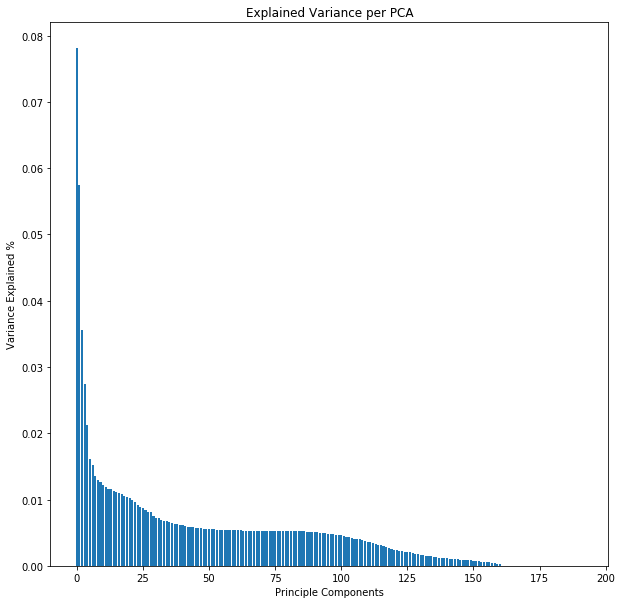

In [67]:
# Investigate the variance accounted for by each principal component.

number_components = np.arange(len(pca.explained_variance_ratio_))
num_comp = len(pca.explained_variance_ratio_)
values = pca.explained_variance_ratio_
ind = np.arange(num_comp)
    
plt.figure(figsize=(10,10))
plt.bar(number_components, values)

plt.ylabel('Variance Explained %') 
plt.xlabel('Principle Components')
plt.title('Explained Variance per PCA')
plt.show()

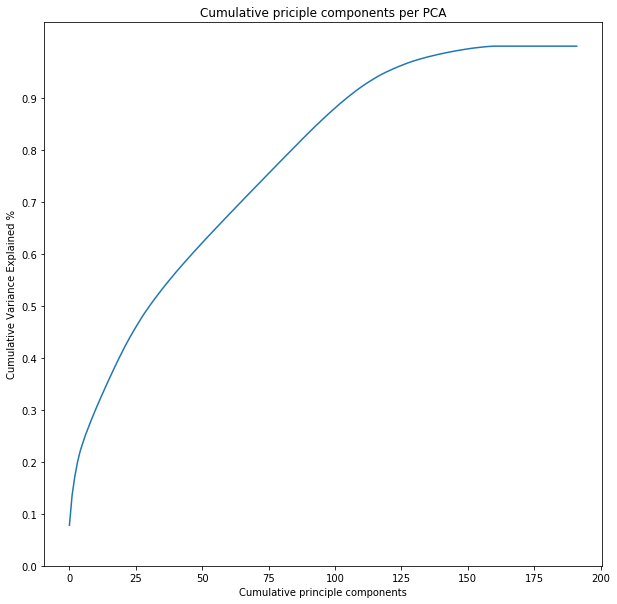

In [68]:
cumvalues = np.cumsum(values)


plt.figure(figsize=(10,10))
plt.plot(number_components,cumvalues)
plt.yticks(np.arange(0,1, step=0.1))
plt.ylabel('Cumulative Variance Explained %')
plt.xlabel('Cumulative principle components')
plt.title('Cumulative priciple components per PCA')
plt.show()

In [69]:
# Re-apply PCA to the data while selecting for number of components to retain.
# from the above plot, we can see the 75 compnents can give us about 75%
# cumulative vraiance 

new_pca = PCA(n_components=75)
reduced_pca = new_pca.fit_transform(scaled_features)

### Discussion 2.2: Perform Dimensionality Reduction

I have choosed to retain 75 principle components which will provide almost 75% of the variance explained.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [70]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
def pca_weights(data, pca, pca_num):
    #convert the pca to Dataframe
    pca_weights = pd.DataFrame(np.round(pca.components_, 3), columns= data.columns).iloc[pca_num]
    pca_weights.sort_values(ascending=False, inplace=True)
    print(pca_weights)

In [71]:
pca_weights(scaled_features,new_pca,0)

LP_STATUS_GROB_1.0                0.197
HH_EINKOMMEN_SCORE                0.187
CAMEO_INTL_2015_wealth            0.185
PLZ8_ANTG3                        0.182
PLZ8_ANTG4                        0.175
ORTSGR_KLS9                       0.155
EWDICHTE                          0.153
FINANZ_HAUSBAUER                  0.149
KBA05_ANTG4                       0.130
LP_STATUS_FEIN_1.0                0.126
PLZ8_ANTG2                        0.125
FINANZ_SPARER                     0.120
KBA05_ANTG3                       0.118
LP_STATUS_FEIN_2.0                0.118
FINANZTYP_1.0                     0.117
ANZ_HAUSHALTE_AKTIV               0.116
CAMEO_DEUG_2015_9                 0.115
ARBEIT                            0.114
RELAT_AB                          0.108
LP_FAMILIE_FEIN_1.0               0.091
LP_FAMILIE_GROB_1.0               0.091
CAMEO_DEUG_2015_8                 0.090
SEMIO_PFLICHT                     0.088
SEMIO_REL                         0.083
PRAEGENDE_JUGENDJAHRE_Decade      0.082


In [72]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_weights(scaled_features,new_pca,1)

ALTERSKATEGORIE_GROB            0.232
FINANZ_VORSORGER                0.217
ZABEOTYP_3.0                    0.200
SEMIO_ERL                       0.180
SEMIO_LUST                      0.163
RETOURTYP_BK_S                  0.155
W_KEIT_KIND_HH                  0.125
CJT_GESAMTTYP_2.0               0.108
LP_STATUS_FEIN_1.0              0.100
FINANZTYP_5.0                   0.098
FINANZ_HAUSBAUER                0.091
FINANZTYP_2.0                   0.090
FINANZ_MINIMALIST               0.083
SEMIO_KRIT                      0.074
SHOPPER_TYP_3.0                 0.074
CJT_GESAMTTYP_1.0               0.071
LP_FAMILIE_FEIN_1.0             0.070
LP_FAMILIE_GROB_1.0             0.070
PLZ8_ANTG3                      0.068
EWDICHTE                        0.068
FINANZTYP_6.0                   0.067
PLZ8_ANTG4                      0.067
ORTSGR_KLS9                     0.066
NATIONALITAET_KZ_1.0            0.066
CAMEO_INTL_2015_wealth          0.063
SEMIO_KAEM                      0.059
GFK_URLAUBER

In [73]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_weights(scaled_features,new_pca,2)

ANREDE_KZ                         0.345
SEMIO_VERT                        0.319
SEMIO_FAM                         0.261
SEMIO_SOZ                         0.257
SEMIO_KULT                        0.251
FINANZTYP_5.0                     0.136
FINANZ_MINIMALIST                 0.129
SHOPPER_TYP_0.0                   0.123
ZABEOTYP_1.0                      0.116
SEMIO_REL                         0.113
SEMIO_MAT                         0.089
RETOURTYP_BK_S                    0.076
GREEN_AVANTGARDE                  0.075
PRAEGENDE_JUGENDJAHRE_Movement    0.075
EWDICHTE                          0.064
ORTSGR_KLS9                       0.064
W_KEIT_KIND_HH                    0.063
LP_STATUS_FEIN_10.0               0.052
LP_STATUS_GROB_5.0                0.052
ZABEOTYP_6.0                      0.050
PLZ8_ANTG3                        0.049
PLZ8_ANTG4                        0.049
FINANZ_VORSORGER                  0.048
LP_STATUS_FEIN_3.0                0.045
LP_STATUS_FEIN_1.0                0.044


### Discussion 2.3: Interpret Principal Components

First Components: 
Positive weights:
- LP_STATUS_GROB_1.0
- HH_EINKOMMEN_SCORE
- CAMEO_INTL_2015_wealth
- PLZ8_ANTG3

Negative weights:
- KBA05_ANTG1
- KBA05_GBZ 
- PLZ8_ANTG1 
- MOBI_REGIO 
- FINANZ_MINIMALIST 

Interpret of the first components:

The first principle is about the social status, wealth, and the family capacity.



Second Components: 
Positive weights:
- ALTERSKATEGORIE_GROB
- FINANZ_VORSORGER
- ZABEOTYP_3.0
- SEMIO_ERL

Negative weights:
- SEMIO_REL
- FINANZ_UNAUFFAELLIGER
- FINANZ_SPARER5
- PRAEGENDE_JUGENDJAHRE_Decade 

Interpret of the first components:

The second principle is about the age, savings, and movement of a person.



Third Components: 
Positive weights:
- ANREDE_KZ
- SEMIO_VERT
- SEMIO_FAM

Negative weights:
- SEMIO_KRIT
- SEMIO_DOM
- SEMIO_KAEM

Interpret of the first components:

The third principle is about the personality, gender.

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [74]:
#Importing KMeans
from sklearn.cluster import KMeans
# Over a number of different cluster counts...
# run k-means clustering on the data and...


scores = []

for center in range(10,25):
    kmeans = KMeans(center)
    model = kmeans.fit(reduced_pca)
    # compute the average within-cluster distances.
    scores.append(abs(model.score(reduced_pca))) 

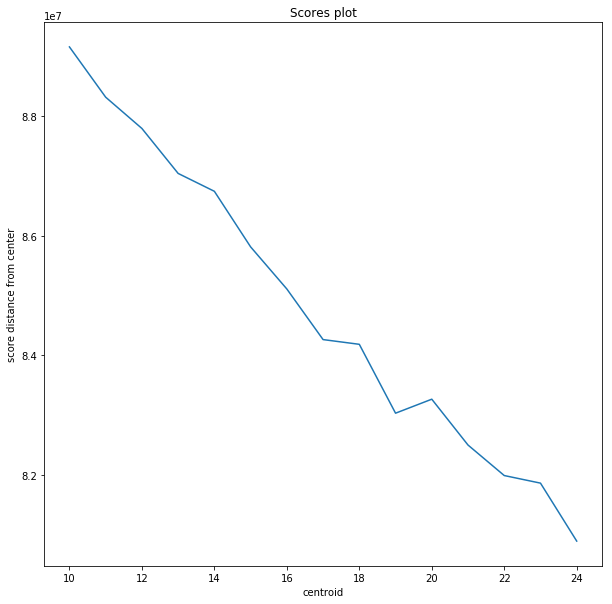

In [75]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.


center = list(range(10,25))
plt.figure(figsize=(10,10))
plt.plot(center, scores)
plt.title("Scores plot")
plt.xlabel('centroid')
plt.ylabel('score distance from center')
plt.show()

In [76]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans = KMeans(n_clusters= 19)
model = kmeans.fit(reduced_pca)
reduced_pred = model.predict(reduced_pca)

### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

In the above graph, I used the elbow method to detrmine the number of clusters.However, it is difficult to see the elbow from the graph, but as number of clusters is increasing the score is decreased so, I picked 19 clusters.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [97]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', delimiter=';')

In [78]:
customers.head(10)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,...,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0
5,1,3,1,4.0,5,1,5,1,2,3,...,2.0,3.0,2.0,1.0,1.0,5.0,5.0,3.0,7.0,5.0
6,2,4,1,2.0,5,1,5,1,1,2,...,3.0,2.0,1.0,0.0,1.0,5.0,5.0,2.0,3.0,2.0
7,1,4,1,2.0,5,1,5,1,2,2,...,3.0,3.0,1.0,1.0,1.0,3.0,3.0,3.0,4.0,3.0
8,2,4,2,1.0,2,2,5,1,1,5,...,1.0,4.0,2.0,1.0,5.0,5.0,4.0,3.0,8.0,3.0
9,1,3,1,3.0,5,2,4,1,3,1,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,3.0,6.0,4.0


In [98]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

customer_preprocessing = clean_data(customers, feat_info)

In [80]:
customer_preprocessing.head(10)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,PRAEGENDE_JUGENDJAHRE_Decade,PRAEGENDE_JUGENDJAHRE_Movement,CAMEO_INTL_2015_wealth,CAMEO_INTL_2015_life_stage
0,4.0,1.0,5.0,1.0,5.0,1.0,2.0,2.0,1,1.0,...,0,0,0,0,0,0,2.0,1.0,1,3
2,4.0,0.0,5.0,1.0,5.0,1.0,4.0,4.0,1,2.0,...,0,0,0,0,0,0,2.0,1.0,3,4
3,4.0,1.0,5.0,1.0,5.0,2.0,1.0,2.0,0,2.0,...,0,0,0,0,0,0,1.0,0.0,2,4
4,3.0,1.0,3.0,1.0,4.0,4.0,5.0,2.0,0,3.0,...,0,0,0,0,0,0,4.0,0.0,4,1
5,3.0,1.0,5.0,1.0,5.0,1.0,2.0,3.0,1,3.0,...,0,0,0,0,0,0,2.0,1.0,3,4
6,4.0,1.0,5.0,1.0,5.0,1.0,1.0,2.0,1,2.0,...,0,0,0,0,0,0,2.0,1.0,2,3
7,4.0,1.0,5.0,1.0,5.0,1.0,2.0,2.0,1,1.0,...,0,0,0,0,0,0,2.0,1.0,1,5
8,4.0,0.0,2.0,2.0,5.0,1.0,1.0,5.0,0,2.0,...,0,0,0,0,0,1,1.0,0.0,5,5
9,3.0,1.0,5.0,2.0,4.0,1.0,3.0,1.0,1,3.0,...,0,0,0,0,0,0,4.0,1.0,1,5
11,4.0,1.0,5.0,1.0,5.0,1.0,3.0,2.0,1,1.0,...,0,0,0,0,0,0,2.0,1.0,1,4


In [81]:
customer_preprocessing.isnull().sum().sum()

0

In [99]:
# Feature scaling 
scaled_customers = scaler.fit_transform(customer_preprocessing)

In [100]:
customers_col = customer_preprocessing.columns

In [101]:
scaled_customers = pd.DataFrame(scaled_customers, columns= customers_col)

In [85]:
scaled_customers.head(10)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,PRAEGENDE_JUGENDJAHRE_Decade,PRAEGENDE_JUGENDJAHRE_Movement,CAMEO_INTL_2015_wealth,CAMEO_INTL_2015_life_stage
0,0.701602,0.702950,0.723187,-0.517025,0.516280,-0.600728,0.136954,-0.553065,1.006989,-1.069075,...,-0.125744,-0.085268,-0.0807,-0.083744,-0.118329,-0.103705,-0.655034,0.988599,-1.132334,-0.277261
1,0.701602,-1.422577,0.723187,-0.517025,0.516280,-0.600728,2.180637,0.965870,1.006989,0.101519,...,-0.125744,-0.085268,-0.0807,-0.083744,-0.118329,-0.103705,-0.655034,0.988599,0.290475,0.470145
2,0.701602,0.702950,0.723187,-0.517025,0.516280,0.396720,-0.884887,-0.553065,-0.993060,0.101519,...,-0.125744,-0.085268,-0.0807,-0.083744,-0.118329,-0.103705,-1.399516,-1.011532,-0.420929,0.470145
3,-0.668378,0.702950,-1.241329,-0.517025,-0.665403,2.391617,3.202478,-0.553065,-0.993060,1.272112,...,-0.125744,-0.085268,-0.0807,-0.083744,-0.118329,-0.103705,0.833930,-1.011532,1.001879,-1.772073
4,-0.668378,0.702950,0.723187,-0.517025,0.516280,-0.600728,0.136954,0.206403,1.006989,1.272112,...,-0.125744,-0.085268,-0.0807,-0.083744,-0.118329,-0.103705,-0.655034,0.988599,0.290475,0.470145
5,0.701602,0.702950,0.723187,-0.517025,0.516280,-0.600728,-0.884887,-0.553065,1.006989,0.101519,...,-0.125744,-0.085268,-0.0807,-0.083744,-0.118329,-0.103705,-0.655034,0.988599,-0.420929,-0.277261
6,0.701602,0.702950,0.723187,-0.517025,0.516280,-0.600728,0.136954,-0.553065,1.006989,-1.069075,...,-0.125744,-0.085268,-0.0807,-0.083744,-0.118329,-0.103705,-0.655034,0.988599,-1.132334,1.217551
7,0.701602,-1.422577,-2.223587,0.681440,0.516280,-0.600728,-0.884887,1.725337,-0.993060,0.101519,...,-0.125744,-0.085268,-0.0807,-0.083744,-0.118329,9.642722,-1.399516,-1.011532,1.713283,1.217551
8,-0.668378,0.702950,0.723187,0.681440,-0.665403,-0.600728,1.158796,-1.312532,1.006989,1.272112,...,-0.125744,-0.085268,-0.0807,-0.083744,-0.118329,-0.103705,0.833930,0.988599,-1.132334,1.217551
9,0.701602,0.702950,0.723187,-0.517025,0.516280,-0.600728,1.158796,-0.553065,1.006989,-1.069075,...,-0.125744,-0.085268,-0.0807,-0.083744,-0.118329,-0.103705,-0.655034,0.988599,-1.132334,0.470145


In [102]:
# Applying PCA

reduced_customers_pca = new_pca.fit_transform(scaled_customers)

In [103]:
pred_customers = model.predict(reduced_customers_pca)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [104]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.
def comparison_2(customer_data, general_pop):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    ax1.set_title('Clusters for Customer')
    sns.countplot(customer_data, ax =ax1, color='green')
    ax2.set_title('Cluster for General')
    sns.countplot(general_pop, ax = ax2, color='orange')
    
    fig.set_figwidth(20)


    plt.show()

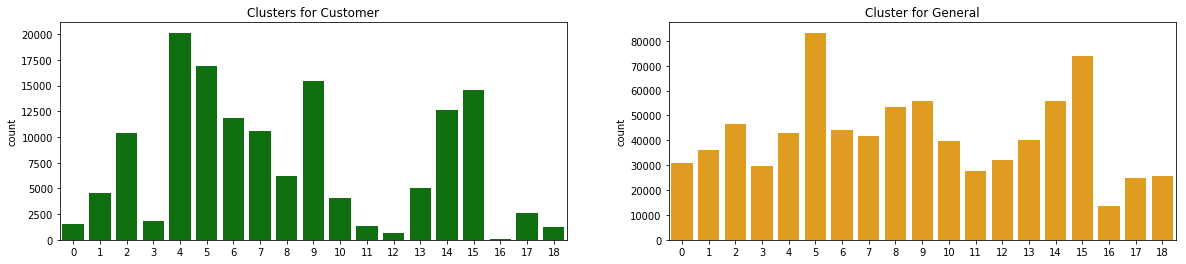

In [105]:
comparison_2(pred_customers, reduced_pred)

In [109]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

customer_centeroid_4 = scaler.inverse_transform(new_pca.inverse_transform(model.cluster_centers_[4]))

In [110]:
customer_4 = pd.Series(data= customer_centeroid_4, index= customer_preprocessing.columns)

In [111]:
print(customer_4)

ALTERSKATEGORIE_GROB              4.146173
ANREDE_KZ                         1.185972
FINANZ_MINIMALIST                 5.116272
FINANZ_SPARER                     0.920080
FINANZ_VORSORGER                  5.054808
FINANZ_ANLEGER                    0.978596
FINANZ_UNAUFFAELLIGER             1.293908
FINANZ_HAUSBAUER                  2.229314
GREEN_AVANTGARDE                  0.546661
HEALTH_TYP                        1.530970
RETOURTYP_BK_S                    4.310874
SEMIO_SOZ                         5.269693
SEMIO_FAM                         4.702293
SEMIO_REL                         3.365159
SEMIO_MAT                         3.076472
SEMIO_VERT                        7.091111
SEMIO_LUST                        6.548364
SEMIO_ERL                         3.991536
SEMIO_KULT                        5.040769
SEMIO_RAT                         1.295440
SEMIO_KRIT                        2.034003
SEMIO_DOM                         2.163680
SEMIO_KAEM                        1.570695
SEMIO_PFLIC

In [107]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
customer_centeroid_16 = scaler.inverse_transform(new_pca.inverse_transform(model.cluster_centers_[16]))

In [112]:
customer_16 = pd.Series(data= customer_centeroid_16, index= customer_preprocessing.columns)

In [113]:
print(customer_16)

ALTERSKATEGORIE_GROB              2.629600
ANREDE_KZ                         0.485650
FINANZ_MINIMALIST                 3.504943
FINANZ_SPARER                     1.951795
FINANZ_VORSORGER                  4.135763
FINANZ_ANLEGER                    2.304913
FINANZ_UNAUFFAELLIGER             2.121144
FINANZ_HAUSBAUER                  2.932685
GREEN_AVANTGARDE                 -0.076675
HEALTH_TYP                        2.665480
RETOURTYP_BK_S                    3.486117
SEMIO_SOZ                         4.007633
SEMIO_FAM                         3.959653
SEMIO_REL                         3.889988
SEMIO_MAT                         3.269072
SEMIO_VERT                        3.845813
SEMIO_LUST                        3.661935
SEMIO_ERL                         5.063468
SEMIO_KULT                        4.106924
SEMIO_RAT                         4.341522
SEMIO_KRIT                        4.658289
SEMIO_DOM                         5.129788
SEMIO_KAEM                        4.838585
SEMIO_PFLIC

### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)

The above comparison graphs shows the following:
- cluster# 4 is overpresented in customer data compared to general population data which indicate the segment of population that are relatively popular with mail-order company: A male who has a personality of family minded, financially prepared, and has a high income.


- cluster# 16 is underrepresented in the customer data compared to the general population data which indicate the segment of population that are relatively unpopular with the mail-order company: A woman who is religious and has a financial low interest. Also, has a personality of critical minded, money saver, dominant minded, and inconspicuous  

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.